In [1]:
%matplotlib inline
import torch
import random

In [2]:
import d2l

### 3.2.1. 生成数据集

In [3]:
from d2l import synthetic_data

In [4]:
# 真实参数
true_w = torch.tensor([-5, 8.6])
true_b = 12.5
example_num = 2000

In [5]:
# 生产样本集
features, labels = synthetic_data(true_w, true_b, example_num)

In [6]:
features[:, 0].detach()

tensor([-2.9172, -1.3056, -0.3365,  ..., -0.7436,  0.5562, -1.0411])

In [7]:
labels[:, 0].detach().numpy()

array([24.390059 , 15.323085 , 26.52378  , ..., 12.065366 , 24.604988 ,
        6.2523394], dtype=float32)

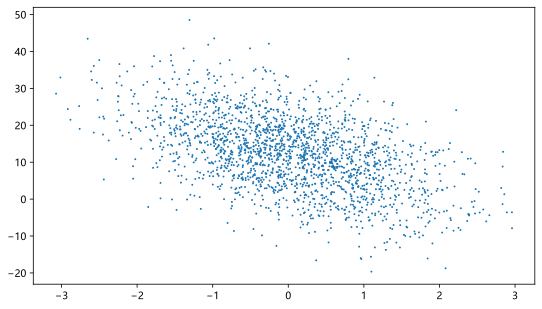

In [8]:
# 可视化样本第一特征和标签的散点图
d2l.set_figsize((9, 5))
d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1)

### 2. 读取数据集

In [9]:
def data_iter(batch_size, features, labels):
    """
    构造数据迭代器
    """
    example_num = len(features)
    index_list = list(range(example_num))  # 随机打乱的索引列表
    random.shuffle(index_list)
    for i in range(0, example_num, batch_size):
        batch_indices = torch.tensor(index_list[i: min(i + batch_size, example_num)])
        yield features[batch_indices], labels[batch_indices]

In [10]:
for x, y in data_iter(10, features, labels):
    print(x)
    print(y)
    break

tensor([[-0.3078,  0.8847],
        [ 2.0506,  1.2720],
        [ 1.1335, -0.8029],
        [-2.1808, -0.0719],
        [ 0.7133,  0.5627],
        [ 0.2291,  0.2227],
        [-1.4061,  0.4292],
        [ 0.1864,  1.0729],
        [-0.8486, -0.4979],
        [ 1.5560,  0.5358]])
tensor([[21.6357],
        [13.1856],
        [-0.0882],
        [22.7831],
        [13.7826],
        [13.2747],
        [23.2179],
        [20.7982],
        [12.4616],
        [ 9.3162]])


### 3. 初始化模型参数

In [11]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)  # w初始化为均值为0，方差为0.01的(2, 1)的张量
b = torch.zeros(1, requires_grad=True)

### 4. 定义模型

In [12]:
from d2l import linreg

### 5. 定义损失函数

In [13]:
from d2l import squared_loss

### 6. 定义优化算法

In [14]:
from d2l import sgd

### 7. 训练模型

In [15]:
lr = 0.03  # 学习率
num_epochs = 3  # 轮询三遍数据
net = linreg  # 神经网络
loss = squared_loss  # 损失函数
batch_size = 10  # 数据块大小

In [16]:
for i in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        y_hat = net(x, w, b)
        l = loss(y_hat, y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f"第{i+1}轮训练的平均损失是: {train_l.mean():f}")

第1轮训练的平均损失是: 0.000830
第2轮训练的平均损失是: 0.000050
第3轮训练的平均损失是: 0.000050


In [22]:
w, b

(tensor([[-5.0005],
         [ 8.6006]], requires_grad=True),
 tensor([12.4996], requires_grad=True))

In [21]:
true_w, true_b

(tensor([-5.0000,  8.6000]), 12.5)

In [24]:
print(f'训练得到的权重参数w与真实w的误差是：{w.reshape(-1, 2) - true_w}')

训练得到的权重参数w与真实w的误差是：tensor([[-0.0005,  0.0006]], grad_fn=<SubBackward0>)


In [26]:
print(f'训练得到的偏置参数b与真实b的误差是：{b - true_b}')

训练得到的偏置参数b与真实b的误差是：tensor([-0.0004], grad_fn=<SubBackward0>)
